In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
#

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images,test_images=train_images/255.0,test_images/255.0

In [4]:
# Model
model=Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile("Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [6]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8768 - loss: 0.4359 - val_accuracy: 0.9506 - val_loss: 0.1623
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9629 - loss: 0.1233 - val_accuracy: 0.9694 - val_loss: 0.1023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9776 - loss: 0.0771 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9717 - val_loss: 0.0895
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0434 - val_accuracy: 0.9749 - val_loss: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9760 - val_loss: 0.0765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0.0251 - val_accuracy: 0.9763 - val_loss: 0.0769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9943 - loss: 0.

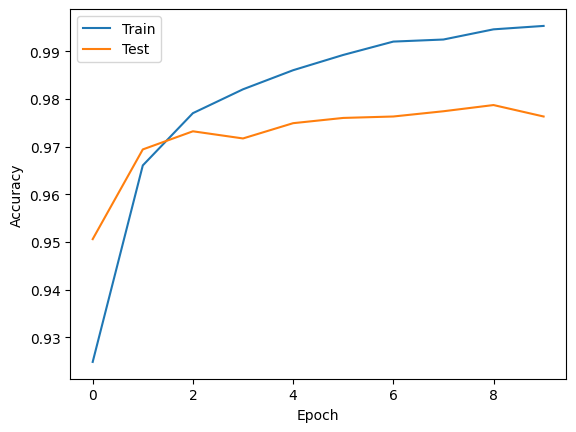

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
## evaluate
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1066


In [9]:
print(test_loss,test_acc)

0.09092293679714203 0.9763000011444092


In [10]:
## Pytorch

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [12]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
## Hyperparameters

In [14]:
batch_size=4
learning_rate=0.001
num_epochs=10
transform_pipeline = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # if needed for RGB models
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [15]:
from torchvision.datasets import MNIST
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform_pipeline)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=25, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 58.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.05MB/s]


In [16]:
classes=['plane','car','bird','cat','deer','dog','deer','frog','horse','ship','truck']


horse plane frog bird plane deer bird dog dog plane plane deer horse deer horse deer cat dog deer cat frog horse ship plane cat


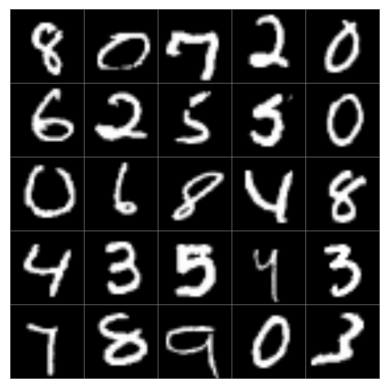

In [17]:
def img_show(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# One batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of the first 25 images
img_grid = torchvision.utils.make_grid(images[:25], nrow=5)

# Print class labels
print(' '.join(f'{classes[labels[j]]}' for j in range(25)))

# Show the image grid
img_show(img_grid)

In [22]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)       # input: [3, 224, 224]
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 64, 3)      # ✅ fix input channels
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(128 * 26 * 26, 120)  # adjust based on output size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)              # assuming 10 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))      # [6, 110, 110]
        x = self.pool(F.relu(self.conv2(x)))      # [64, 54, 54]
        x = self.pool(F.relu(self.conv3(x)))      # [128, 26, 26]
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNet().to(device)
## Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
## Training
steps_per_epoch=10
for epoch in range(10):
  running_loss=0.0
  for (inputs,labels) in train_loader:
    inputs,labels=inputs.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader)}")
print('Finished Training')

In [ ]:
## Evaluation

In [25]:
n_correct,n_total=0,0
model.eval()
with torch.no_grad():
  for (images,labels) in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    output=model(images)
    ## take class with highest value for prediction
    _,predicted=torch.max(output.data,1)
    n_total+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()
  print(f'Accuracy on test set:{n_correct/n_total:.3f}')

Accuracy on test set:0.229
